# Documentação networkx

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html


In [1]:
import networkx as nx
import pandas as pd
from pyvis.network import Network
#import sqlalchemy
import ibm_db
import ibm_db_dbi

In [16]:
#conactando ao BigSql
# COLOCAR CREDENCIAIS
db = ibm_db.connect("DATABASE=BIGSQL;HOSTNAME=bigsql.pro.intra.rs.gov.br;PORT=32051;PROTOCOL=TCPIP;UID=XXXXXXX;PWD=XXXXXX;", "", "")
conn = ibm_db_dbi.Connection(db)   
#cur = conn.cursor()

In [17]:
# buscando os dados 
query = "select SRC,TGT,REL,WEIGHT from PROCERGS_MILENA_VILLAR.RELACIONAMENTO;"
df = pd.read_sql_query(query, conn)
g = nx.from_pandas_edgelist(df, 'SRC', 'TGT', edge_attr=True)


In [24]:
# criando o grafo não direcionado
G = nx.Graph(g)


In [25]:
#verificando os atributos das arestas
G.edges(1,data=True)

EdgeDataView([(1, 2, {'REL': 'marido', 'WEIGHT': 4}), (1, 3, {'REL': 'mãe', 'WEIGHT': 5}), (1, 4, {'REL': 'mãe', 'WEIGHT': 5}), (1, 16, {'REL': 'irmã', 'WEIGHT': 3}), (1, 14, {'REL': 'mãe', 'WEIGHT': 5}), (1, 15, {'REL': 'pai', 'WEIGHT': 5}), (1, 11, {'REL': 'cunhada', 'WEIGHT': 1}), (1, 10, {'REL': 'irmão', 'WEIGHT': 3}), (1, 5, {'REL': 'sogra', 'WEIGHT': 1})])

In [26]:
# plotar o grafo
nt = Network("400px", "900px", notebook = True)
nt.from_nx(G)
nt.show("grafo.html")

In [27]:
#buscando os labels dos nós(vértices)
query = "select * from PROCERGS_MILENA_VILLAR.PESSOAS;"
df_node = pd.read_sql_query(query, conn)

In [28]:
#transformando a tabela em um dicionário para atribuir labels aos IDs dos nós
nodelabel = df_node.set_index("ID").T.to_dict('records')[0]
# atribuindo o atributo label
nx.set_node_attributes(G, nodelabel, 'title')
G.nodes(data=True)

NodeDataView({2: {'size': 10, 'title': 'Eloi'}, 1: {'size': 10, 'title': 'Vivianne'}, 3: {'size': 10, 'title': 'Jade'}, 4: {'size': 10, 'title': 'Camila'}, 10: {'size': 10, 'title': 'Fabio'}, 16: {'size': 10, 'title': 'Virginia'}, 11: {'size': 10, 'title': 'Elis'}, 12: {'size': 10, 'title': 'Felipe'}, 13: {'size': 10, 'title': 'Brenda'}, 15: {'size': 10, 'title': 'Ney'}, 14: {'size': 10, 'title': 'Maria'}, 17: {'size': 10, 'title': 'Joaquim'}, 18: {'size': 10, 'title': 'Marisa'}, 7: {'size': 10, 'title': 'Inês'}, 19: {'size': 10, 'title': 'Maiara'}, 20: {'size': 10, 'title': 'Ligia'}, 8: {'size': 10, 'title': 'Barbara'}, 6: {'size': 10, 'title': 'Ricardo'}, 5: {'size': 10, 'title': 'Eduardo'}, 9: {'size': 10, 'title': 'Carolina'}})

## Algoritmo Eigenvector
Atribui maiores pesos aos vértices que estão conectados a outros vértices com graus de centralidade elevados.
Não implementado para grafos multidirecionais.
Palavra - chave: influência.

In [29]:
for k, v in sorted(nx.eigenvector_centrality(G, weight = 'WEIGHT').items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

15 : 0.38616624255319576
14 : 0.38616624255319576
1 : 0.34449814730669354
10 : 0.3255336811527021
4 : 0.32085044178536964
3 : 0.2657384104383246
12 : 0.2506077411312469
13 : 0.2506077411312469
16 : 0.2271589402002375
2 : 0.1825581599745606
11 : 0.16009965832849488
6 : 0.11454370996198945
8 : 0.11008435874037252
9 : 0.11008435874037252
7 : 0.1078116898184205
5 : 0.08145454296746378
17 : 0.06568921699453438
18 : 0.06568921699453438
19 : 0.039518457791222907
20 : 0.039518457791222907


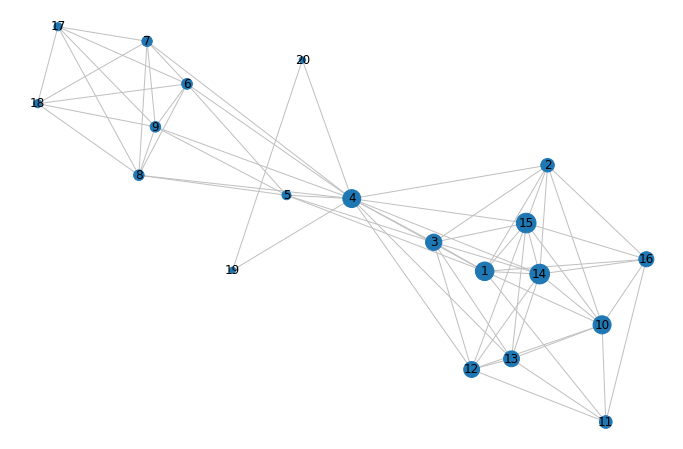

In [11]:
# plotando conforme o grau de proximidade (closeness)
import matplotlib.pyplot as plt
egc = nx.eigenvector_centrality(G, weight = 'WEIGHT')
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in egc.values()], edge_color='silver')

In [13]:
list(G.neighbors(15))

[2, 1, 3, 4, 10, 16, 12, 13, 14]

In [14]:
# grau de centralidade
centrality = nx.degree_centrality(G)
sorted(centrality.items(), reverse= True, key=lambda x: x[1])

[(4, 0.7368421052631579),
 (1, 0.47368421052631576),
 (15, 0.47368421052631576),
 (14, 0.47368421052631576),
 (3, 0.42105263157894735),
 (10, 0.42105263157894735),
 (2, 0.3684210526315789),
 (12, 0.3684210526315789),
 (13, 0.3684210526315789),
 (8, 0.3684210526315789),
 (6, 0.3684210526315789),
 (9, 0.3684210526315789),
 (16, 0.3157894736842105),
 (7, 0.3157894736842105),
 (5, 0.3157894736842105),
 (11, 0.2631578947368421),
 (17, 0.2631578947368421),
 (18, 0.2631578947368421),
 (19, 0.10526315789473684),
 (20, 0.10526315789473684)]